In [1]:
from tradeoff import pure_dp_privacy_profile, pure_dp_privacy_profile_eps, support_tradeoff, get_gaussian_privacy_profile

import numpy as np

pure_epsilon = 1.0
alpha = 0.0
epsilons1 = np.arange(0, 6, 0.01)
deltas1 = [pure_dp_privacy_profile(pure_epsilon, e) for e in epsilons1]
betas1 = [support_tradeoff(alpha, epsilons1[i], deltas1[i]) for i in range(0, len(deltas1))]

deltas2 = np.arange(0, 1, 0.01)
epsilons2 = [pure_dp_privacy_profile_eps(pure_epsilon, d) for d in deltas2]
betas2 = [support_tradeoff(alpha, epsilons2[i], deltas2[i]) for i in range(0, len(deltas2))]

In [4]:
support_tradeoff(0.99, 0.9999999999999999, pure_dp_privacy_profile(1, 0.9999999999999999))
support_tradeoff(0.8, 0.9999999999999999, pure_dp_privacy_profile(1, 0.9999999999999999))
pure_dp_privacy_profile_eps(pure_epsilon, 0.19)
pure_dp_privacy_profile_eps(pure_epsilon, 0.2)
#support_tradeoff(0.8, 0.9275399528473891, 0.19)

0.9235768548788367

/mnt/data/research/opendp/opendp-relative-risk/tradeoff.py:106: RuntimeWarning: divide by zero encountered in log
  return privacy_profile(np.log(-x)) - alpha * x
/tmp/ipykernel_42028/841726299.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax5.legend()
/tmp/ipykernel_42028/841726299.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax6.legend()


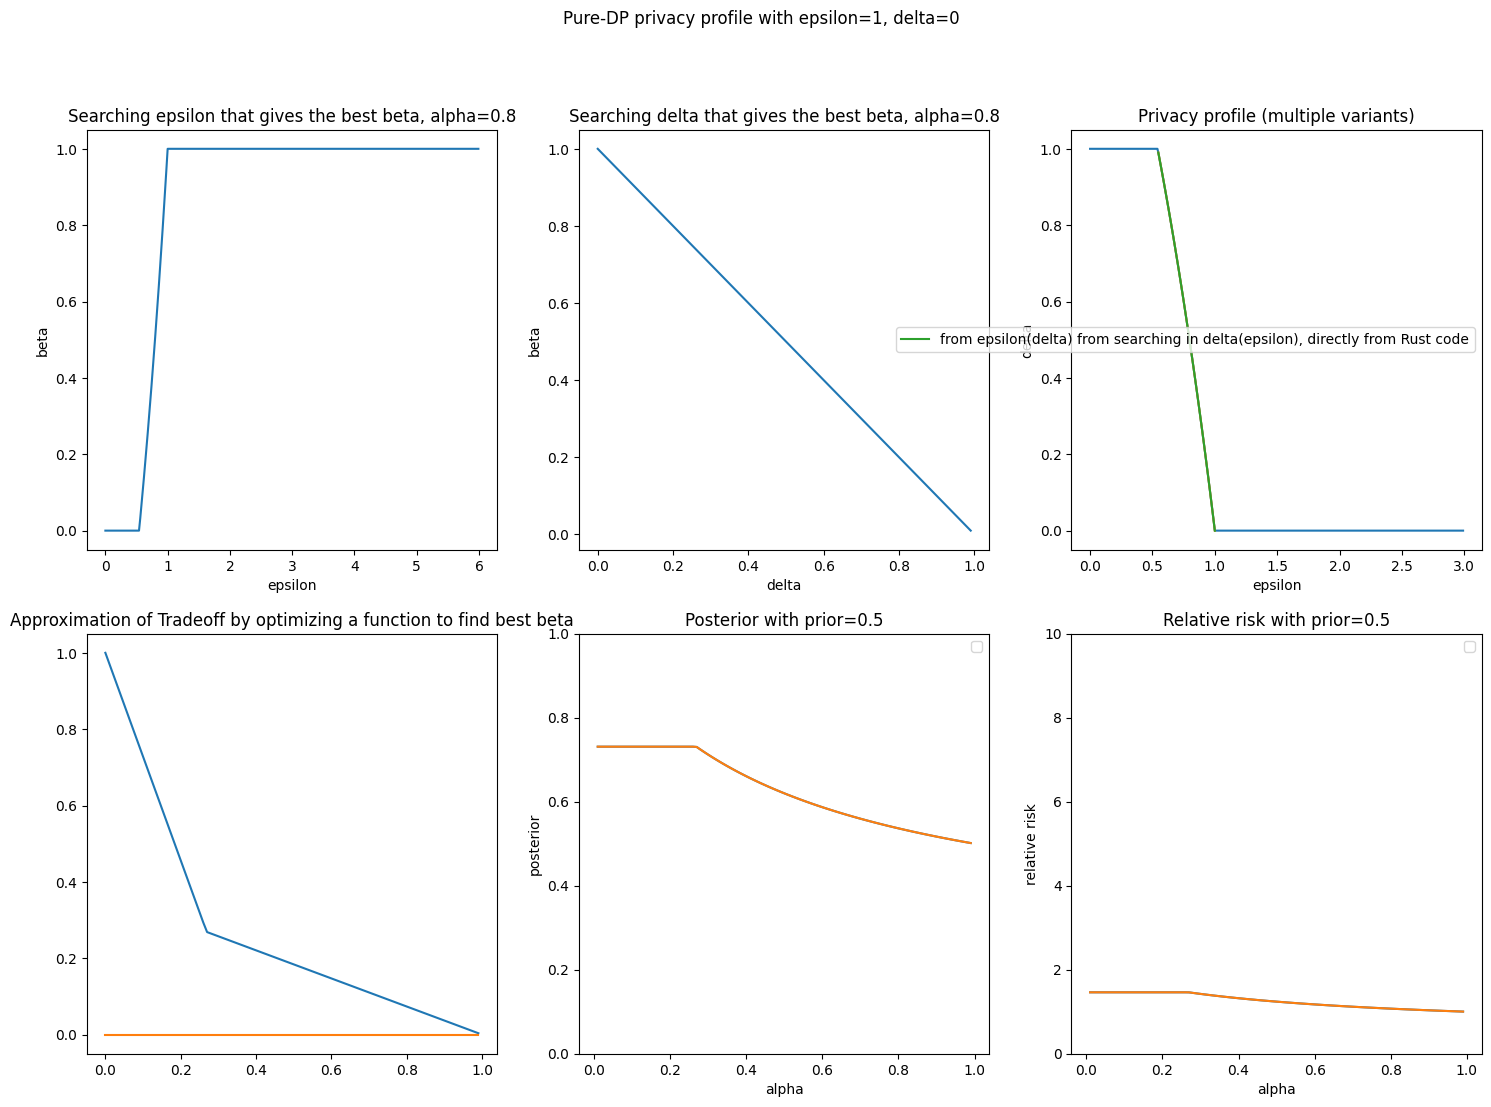

In [6]:
import matplotlib.pyplot as plt
import math

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Pure-DP privacy profile with epsilon=1, delta=0")

ax1.set_title("Searching epsilon that gives the best beta, alpha=0.8")
ax1.plot(epsilons1, betas1)
ax1.set_xlabel("epsilon")
ax1.set_ylabel("beta")

ax2.set_title("Searching delta that gives the best beta, alpha=0.8")
ax2.plot(deltas2, betas2)
ax2.set_xlabel("delta")
ax2.set_ylabel("beta")

ax3.set_title("Privacy profile (multiple variants)")
ax3.plot(epsilons1[0:300], deltas1[0:300])
ax3.plot(epsilons2, deltas2)
numbers = [0.9999999999999998, 0.9963144221825099, 0.9926152106174437, 0.9889022640618175, 0.985175480140712, 0.981434755330334, 0.9776799849407629, 0.9739110630983685, 0.9701278827279003, 0.9663303355342324, 0.9625183119837647, 0.9586917012854644, 0.9548503913715467, 0.9509942688777798, 0.9471232191234124, 0.9432371260907065, 0.9393358724040769, 0.9354193393088153, 0.9314874066494028, 0.927539952847389, 0.9235768548788367, 0.9195979882513147, 0.915603226980434, 0.9115924435659105, 0.9075655089671488, 0.9035222925783292, 0.899462662202992, 0.8953864840281015, 0.891293622597581, 0.8871839407853024, 0.8830572997675191, 0.8789135589947292, 0.8747525761629502, 0.870574207184397, 0.8663783061575416, 0.862164725336545, 0.8579333151000393, 0.8536839239192496, 0.8494163983254329, 0.8451305828766218, 0.8408263201236494, 0.8365034505754441, 0.8321618126635656, 0.8278012427059737, 0.8234215748699978, 0.8190226411344969, 0.81460427125118, 0.8101662927050707, 0.8057085306740887, 0.801230807987728, 0.7967329450848044, 0.7922147599702498, 0.7876760681709241, 0.7831166826904227, 0.7785364139628453, 0.7739350698055052, 0.7693124553705409, 0.764668373095409, 0.7600026226522181, 0.7553150008958771, 0.750605301811023, 0.745873316457691, 0.741118832915695, 0.7363416362276785, 0.731541508340799, 0.7267182280470055, 0.7218715709218702, 0.7170013092619282, 0.712107212020487, 0.707189044741854, 0.7022465694939417, 0.6972795447991968, 0.6922877255638078, 0.6872708630051331, 0.6822287045773037, 0.6771609938949377, 0.6720674706549136, 0.6669478705561401, 0.6618019252172622, 0.6566293620922392, 0.6514299043837266, 0.6462032709541962, 0.6409491762347198, 0.6356673301313445, 0.6303574379289824, 0.6250192001927346, 0.619652312666568, 0.6142564661692568, 0.6088313464875037, 0.6033766342661441, 0.5978920048953398, 0.592377128394663, 0.5868316692939655, 0.5812552865109256, 0.575647633225163, 0.5700083567488032, 0.564337098393372, 0.5586334933328934, 0.5528971704630616, 0.5471277522563505]
ax3.plot(numbers, np.arange(0, 1, 0.01), label="from epsilon(delta) from searching in delta(epsilon), directly from Rust code")
ax3.set_xlabel("epsilon")
ax3.set_ylabel("delta")
ax3.legend()


ax4.set_title("Approximation of Tradeoff by optimizing a function to find best beta")
numbers = [0.9999999999999991, 0.9728171817154087, 0.9456343634308182, 0.9184515451462278, 0.8912687268616374, 0.8640859085770469, 0.8369030902924565, 0.809720272007866, 0.7825374537232755, 0.7553546354386851, 0.7281718171540947, 0.7009889988695042, 0.6738061805849138, 0.6466233623003234, 0.6194405440157329, 0.5922577257311425, 0.565074907446552, 0.5378920891619616, 0.5107092708773712, 0.4835264525927807, 0.45634363430819025, 0.4291608160235999, 0.40197799773900933, 0.37479517945441887, 0.3476123611698285, 0.32042954288523806, 0.2932467246006476, 0.2685519920551527, 0.26487319764343825, 0.2611944032317238, 0.2575156088200094, 0.253836814408295, 0.25015801999658055, 0.24647922558486612, 0.2428004311731517, 0.2391216367614373, 0.23544284234972288, 0.23176404793800845, 0.22808525352629402, 0.2244064591145796, 0.22072766470286517, 0.21704887029115078, 0.21337007587943635, 0.20969128146772192, 0.2060124870560075, 0.20233369264429307, 0.19865489823257865, 0.19497610382086422, 0.19129730940914977, 0.18761851499743534, 0.18393972058572092, 0.1802609261740065, 0.17658213176229207, 0.17290333735057764, 0.16922454293886321, 0.1655457485271488, 0.16186695411543436, 0.15818815970371997, 0.15450936529200554, 0.15083057088029111, 0.1471517764685767, 0.14347298205686226, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
numbers2 = [0.9999999999999991, 0.9728171817154087, 0.9456343634308182, 0.9184515451462278, 0.8912687268616374, 0.8640859085770469, 0.8369030902924565, 0.809720272007866, 0.7825374537232755, 0.7553546354386851, 0.7281718171540947, 0.7009889988695042, 0.6738061805849138, 0.6466233623003234, 0.6194405440157329, 0.5922577257311425, 0.565074907446552, 0.5378920891619616, 0.5107092708773712, 0.4835264525927807, 0.45634363430819025, 0.4291608160235999, 0.40197799773900933, 0.37479517945441887, 0.3476123611698285, 0.32042954288523806, 0.2932467246006476, 0.2685519920551527, 0.26487319764343825, 0.2611944032317238, 0.2575156088200094, 0.253836814408295, 0.25015801999658055, 0.24647922558486612, 0.2428004311731517, 0.2391216367614373, 0.23544284234972288, 0.23176404793800845, 0.22808525352629402, 0.2244064591145796, 0.22072766470286517, 0.21704887029115078, 0.21337007587943635, 0.20969128146772192, 0.2060124870560075, 0.20233369264429307, 0.19865489823257865, 0.19497610382086422, 0.19129730940914977, 0.18761851499743534, 0.18393972058572092, 0.1802609261740065, 0.17658213176229207, 0.17290333735057764, 0.16922454293886321, 0.1655457485271488, 0.16186695411543436, 0.15818815970371997, 0.15450936529200554, 0.15083057088029111, 0.1471517764685767, 0.14347298205686226, 0.13979418764514784, 0.13611539323343338, 0.13243659882171896, 0.12875780441000453, 0.1250790099982901, 0.12140021558657568, 0.11772142117486126, 0.11404262676314687, 0.11036383235143243, 0.10668503793971801, 0.10300624352800358, 0.09932744911628916, 0.09564865470457473, 0.09196986029286029, 0.08829106588114587, 0.08461227146943144, 0.08093347705771702, 0.07725468264600259, 0.07357588823428815, 0.06989709382257372, 0.06621829941085934, 0.06253950499914492, 0.05886071058743048, 0.05518191617571606, 0.051503121764001625, 0.0478243273522872, 0.044145532940572774, 0.04046673852885834, 0.036787944117143916, 0.03310914970542949, 0.029430355293715058, 0.025751560882000632, 0.022072766470286245, 0.018393972058571816, 0.014715177646857387, 0.011036383235142957, 0.00735758882342853, 0.0036787944117141016]
numbers3 = [1.0, 0.9728171817154095, 0.9456343634308191, 0.9184515451462286, 0.8912687268616382, 0.8640859085770477, 0.8369030902924572, 0.8097202720078669, 0.7825374537232763, 0.755354635438686, 0.7281718171540954, 0.700988998869505, 0.6738061805849146, 0.6466233623003241, 0.6194405440157337, 0.5922577257311432, 0.5650749074465528, 0.5378920891619623, 0.510709270877372, 0.4835264525927814, 0.4563436343081909, 0.42916081602360057, 0.4019779977390101, 0.37479517945441965, 0.3476123611698292, 0.3204295428852387, 0.29324672460064827, 0.26855199205515295, 0.2648731976434382, 0.26119440323172377, 0.25751560882000935, 0.2538368144082949, 0.2501580199965808, 0.24647922558486637, 0.24280043117315195, 0.23912163676143755, 0.23544284234972312, 0.2317640479380087, 0.22808525352629427, 0.22440645911457985, 0.22072766470286515, 0.21704887029115075, 0.21337007587943632, 0.2096912814677219, 0.20601248705600747, 0.20233369264429305, 0.19865489823257862, 0.19497610382086417, 0.19129730940914974, 0.18761851499743532, 0.1839397205857209, 0.18026092617400646, 0.17658213176229204, 0.17290333735057792, 0.1692245429388635, 0.16554574852714907, 0.16186695411543464, 0.15818815970372024, 0.15450936529200582, 0.1508305708802911, 0.14715177646857666, 0.14347298205686224, 0.1397941876451478, 0.1361153932334337, 0.13243659882171926, 0.12875780441000484, 0.12507900999829008, 0.12140021558657567, 0.11772142117486155, 0.11404262676314716, 0.11036383235143274, 0.1066850379397183, 0.10300624352800357, 0.09932744911628914, 0.09564865470457472, 0.09196986029286028, 0.08829106588114585, 0.08461227146943143, 0.08093347705771732, 0.0772546826460029, 0.07357588823428846, 0.06989709382257403, 0.06621829941085933, 0.0625395049991449, 0.058860710587430476, 0.05518191617571637, 0.05150312176400194, 0.04782432735228719, 0.04414553294057277, 0.040466738528858334, 0.03678794411714423, 0.0331091497054298, 0.029430355293715054, 0.025751560882000625, 0.022072766470286564, 0.018393972058571812, 0.01471517764685771, 0.011036383235143282, 0.007357588823428855, 0.003678794411714101]
#ax4.plot(np.arange(0, 1, 0.01), numbers)
#ax4.plot(np.arange(0, 1, 0.01), numbers2)
ax4.plot(np.arange(0, 1, 0.01), numbers3)

from tradeoff import tradeoff_opt_gaussian
betas3 = [tradeoff_opt_gaussian(a, (lambda e: pure_dp_privacy_profile(1.0, e))) for a in np.arange(0, 1, 0.01)]
ax4.plot(np.arange(0, 1, 0.01), betas3)
#betas4 = [tradeoff_opt_gaussian(a, (lambda e: get_gaussian_privacy_profile(1, 1)(e))) for a in np.arange(0, 1, 0.01)]
#ax4.plot(np.arange(0, 1, 0.01), betas4)

for delta in np.arange(0, 0.2, 0.05):
    pass
    #epsilon = pure_dp_privacy_profile_eps(1, delta)
    #ax4.plot(np.arange(0, 1, 0.01), [support_tradeoff(a, epsilon, delta) for a in np.arange(0, 1, 0.01)])


posts = [np.nan, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.731058578630005, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.731058578630005, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7303903968473721, 0.7241723897448129, 0.7181197294115048, 0.7122259071328356, 0.7064847513821213, 0.7008904062645053, 0.6954373115936532, 0.6901201844587525, 0.68493400215336, 0.6798739863501403, 0.6749355884166898, 0.6701144757775926, 0.6654065192367622, 0.6608077811821014, 0.656314504601656, 0.651923102846872, 0.647630150084332, 0.6434323723825474, 0.6393266393850724, 0.6353099565254275, 0.6313794577431459, 0.6275323986637078, 0.6237661502082585, 0.6200781926018403, 0.6164661097514403, 0.6129275839675002, 0.6094603910046498, 0.6060623953993685, 0.602731546084038, 0.5994658722584577, 0.5962634795013612, 0.5931225461058112, 0.5900413196235812, 0.5870181136047466, 0.5840513045197427, 0.5811393288520837, 0.578280680350806, 0.5754739074324907, 0.5727176107234486, 0.5700104407333273, 0.567351095652011, 0.5647383192622585, 0.5621708989610477, 0.5596476638830766, 0.5571674831203219, 0.5547292640319671, 0.5523319506393906, 0.549974522101266, 0.5476559912641433, 0.5453754032841904, 0.5431318343160499, 0.5409243902650323, 0.5387522055991003, 0.5366144422173328, 0.5345102883717556, 0.5324389576396306, 0.5303996879434646, 0.5283917406161778, 0.5264143995090164, 0.5244669701399534, 0.5225487788804434, 0.5206591721785352, 0.518797515816459, 0.5169631942009155, 0.5151556096843994, 0.5133741819159858, 0.5116183472200965, 0.509887558001852, 0.5081812821776891, 0.5064990026299995, 0.5048402166846198, 0.5032044356100583, 0.5015911841374149]
posts2 = [np.nan, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.731058578630005, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.731058578630005, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.7310585786300048, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7310585786300049, 0.7303903968473721, 0.7241723897448129, 0.7181197294115048, 0.7122259071328356, 0.7064847513821213, 0.7008904062645053, 0.6954373115936532, 0.6901201844587525, 0.68493400215336, 0.6798739863501403, 0.6749355884166898, 0.6701144757775926, 0.6654065192367622, 0.6608077811821014, 0.656314504601656, 0.651923102846872, 0.647630150084332, 0.6434323723825474, 0.6393266393850724, 0.6353099565254275, 0.6313794577431459, 0.6275323986637078, 0.6237661502082585, 0.6200781926018403, 0.6164661097514403, 0.6129275839675002, 0.6094603910046498, 0.6060623953993685, 0.602731546084038, 0.5994658722584577, 0.5962634795013612, 0.5931225461058112, 0.5900413196235812, 0.5870181136047466, 0.5840513045197427, 0.5811393288520837, 0.578280680350806, 0.5754739074324907, 0.5727176107234486, 0.5700104407333273, 0.567351095652011, 0.5647383192622585, 0.5621708989610477, 0.5596476638830766, 0.5571674831203219, 0.5547292640319671, 0.5523319506393906, 0.549974522101266, 0.5476559912641433, 0.5453754032841904, 0.5431318343160499, 0.5409243902650323, 0.5387522055991003, 0.5366144422173328, 0.5345102883717556, 0.5324389576396306, 0.5303996879434646, 0.5283917406161778, 0.5264143995090164, 0.5244669701399534, 0.5225487788804434, 0.5206591721785352, 0.518797515816459, 0.5169631942009155, 0.5151556096843994, 0.5133741819159858, 0.5116183472200965, 0.509887558001852, 0.5081812821776891, 0.5064990026299995, 0.5048402166846198, 0.5032044356100583, 0.5015911841374149]
ax5.plot(np.arange(0, 1, 0.01), posts)
ax5.plot(np.arange(0, 1, 0.01), posts2)
ax5.set_title("Posterior with prior=0.5")
ax5.set_xlabel("alpha")
ax5.set_ylabel("posterior")
ax5.set_ylim((0, 1))
ax5.legend()

rrisks = [np.nan, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.46211715726001, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.46211715726001, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4607807936947441, 1.4483447794896258, 1.4362394588230096, 1.4244518142656712, 1.4129695027642426, 1.4017808125290105, 1.3908746231873064, 1.380240368917505, 1.36986800430672, 1.3597479727002806, 1.3498711768333795, 1.3402289515551853, 1.3308130384735244, 1.3216155623642027, 1.312629009203312, 1.303846205693744, 1.295260300168664, 1.2868647447650947, 1.2786532787701448, 1.270619913050855, 1.2627589154862917, 1.2550647973274156, 1.247532300416517, 1.2401563852036805, 1.2329322195028807, 1.2258551679350005, 1.2189207820092995, 1.212124790798737, 1.205463092168076, 1.1989317445169154, 1.1925269590027223, 1.1862450922116223, 1.1800826392471624, 1.1740362272094933, 1.1681026090394855, 1.1622786577041675, 1.156561360701612, 1.1509478148649814, 1.1454352214468972, 1.1400208814666546, 1.134702191304022, 1.129476638524517, 1.1243417979220953, 1.1192953277661533, 1.1143349662406439, 1.1094585280639342, 1.1046639012787811, 1.099949044202532, 1.0953119825282867, 1.0907508065683809, 1.0862636686320999, 1.0818487805300645, 1.0775044111982006, 1.0732288844346656, 1.0690205767435113, 1.0648779152792611, 1.0607993758869292, 1.0567834812323555, 1.0528287990180327, 1.0489339402799067, 1.0450975577608868, 1.0413183443570704, 1.037595031632918, 1.033926388401831, 1.0303112193687989, 1.0267483638319717, 1.023236694440193, 1.019775116003704, 1.0163625643553782, 1.012998005259999, 1.0096804333692395, 1.0064088712201167, 1.0031823682748298]
rrisks2 = [np.nan, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.46211715726001, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.46211715726001, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.4621171572600096, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4621171572600098, 1.4607807936947441, 1.4483447794896258, 1.4362394588230096, 1.4244518142656712, 1.4129695027642426, 1.4017808125290105, 1.3908746231873064, 1.380240368917505, 1.36986800430672, 1.3597479727002806, 1.3498711768333795, 1.3402289515551853, 1.3308130384735244, 1.3216155623642027, 1.312629009203312, 1.303846205693744, 1.295260300168664, 1.2868647447650947, 1.2786532787701448, 1.270619913050855, 1.2627589154862917, 1.2550647973274156, 1.247532300416517, 1.2401563852036805, 1.2329322195028807, 1.2258551679350005, 1.2189207820092995, 1.212124790798737, 1.205463092168076, 1.1989317445169154, 1.1925269590027223, 1.1862450922116223, 1.1800826392471624, 1.1740362272094933, 1.1681026090394855, 1.1622786577041675, 1.156561360701612, 1.1509478148649814, 1.1454352214468972, 1.1400208814666546, 1.134702191304022, 1.129476638524517, 1.1243417979220953, 1.1192953277661533, 1.1143349662406439, 1.1094585280639342, 1.1046639012787811, 1.099949044202532, 1.0953119825282867, 1.0907508065683809, 1.0862636686320999, 1.0818487805300645, 1.0775044111982006, 1.0732288844346656, 1.0690205767435113, 1.0648779152792611, 1.0607993758869292, 1.0567834812323555, 1.0528287990180327, 1.0489339402799067, 1.0450975577608868, 1.0413183443570704, 1.037595031632918, 1.033926388401831, 1.0303112193687989, 1.0267483638319717, 1.023236694440193, 1.019775116003704, 1.0163625643553782, 1.012998005259999, 1.0096804333692395, 1.0064088712201167, 1.0031823682748298]
ax6.plot(np.arange(0, 1, 0.01), rrisks)
ax6.plot(np.arange(0, 1, 0.01), rrisks2)
ax6.set_title("Relative risk with prior=0.5")
ax6.set_xlabel("alpha")
ax6.set_ylabel("relative risk")
ax6.set_ylim((0, 10))
ax6.legend()

In [9]:
pure_dp_privacy_profile(pure_epsilon, 1.0)
support_tradeoff(0.23, 0.33333333333333326, pure_dp_privacy_profile(pure_epsilon, 0.33333333333333326))
support_tradeoff(0.23, 1, 0)
support_tradeoff(0.0, 0.9999999999999998, pure_dp_privacy_profile(pure_epsilon, 0.9999999999999998))

0.9999999999999996

In [11]:
from relative_risk import posterior

# Expected.

posterior(0, (lambda a: support_tradeoff(a, 1.0, 0)), 0.5)

ZeroDivisionError: float division by zero

In [5]:
pure_epsilon = 1.0
alpha = 0.23
epsilons = np.arange(0, 6, 0.001)
eps_max = 10
gaussian_pp = get_gaussian_privacy_profile(1, 1)
from tradeoff import get
eps_small = gaussian_pp
deltas = [gaussian_pp(e) for e in epsilons]
betas = [support_tradeoff(alpha, epsilons[i], deltas[i]) for i in range(0, len(deltas))]

In [6]:
gaussian_pp(0)

np.float64(0.38292492254802624)

Text(0, 0.5, 'delta')

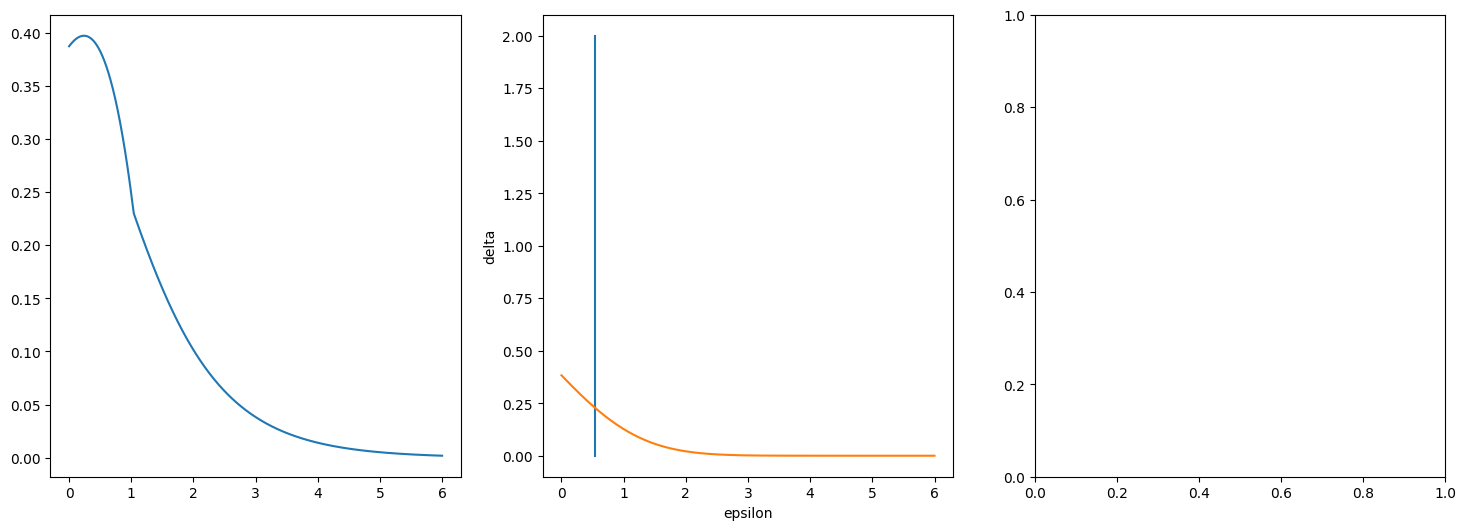

In [7]:
import matplotlib.pyplot as plt
import math

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.plot(epsilons, betas)


t = [0, 2]
t2 = [math.log(math.exp(pure_epsilon )- 1.0), math.log(math.exp(pure_epsilon) - 1.0)]
ax2.plot(t2, t)
ax2.plot(epsilons, deltas)
ax2.set_xlabel("epsilon")
ax2.set_ylabel("delta")

